# Need to run automatic lfilter as pbs job

In [2]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.cm.get_cmap("gist_earth")
from datetime import timedelta
# import filtering
import numpy as np
import dask
from dask.distributed import Client,default_client



def startdask():
    try:
    # Try to get the existing Dask client
        client = default_client()
        print(client)
    except ValueError:
        # If there's no existing client, create a new one
        client = Client()
        print(client)
    return client

client = startdask()


/jobfs/110810193.gadi-pbs/ipykernel_1192963/2259122649.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  earth_cmap = matplotlib.cm.get_cmap("gist_earth")


<Client: 'tcp://127.0.0.1:36315' processes=7 threads=28, memory=112.00 GiB>


In [4]:
e = tt.collect_data("full-20",rawdata = ["e"]).sel(yb = 0,method = "nearest").isel(xb = 150)

loading e...	done.


In [62]:
## Calculate coriolis frequency at 42 south
omega = 7.2921 * 10**(-5)
f = 2 * omega * np.sin(np.pi * 42 / 180)
f

9.75873458925886e-05

In [66]:
np.pi * 2 / (f * 3600)

17.884790656314802

In [26]:
data = e.e.isel(rho2_i = 40).load()

data = data.assign_coords({"time":data.time * 3600})

In [67]:
import xrft 

def plot_power_spectrum(data,title):

    m2 = 1 / (12.45 * 3600)
    f = 1 / (17.89 * 3600)

    ps = xrft.power_spectrum(data, dim=['time'], window=True,true_phase = True)

    fig,ax = plt.subplots(1,figsize = (10,10))

    ps.plot(xscale = "log",yscale = "log",ax = ax)
    # ps.plot(ax = ax)

    ax.vlines(m2,0,10,color = "red",linestyle = "dashed",label = "M2")
    ax.vlines(2 * m2,0,10,color = "green",linestyle = "dashed",label = "2 x M2")
    ax.vlines(f,0,10,color = "black",linestyle = "dashed",label = "f")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power")
    ax.set_title(title)
    ax.legend()

# plot_power_spectrum(data,"Isopycnal displacement with tides")



loading e...	done.


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


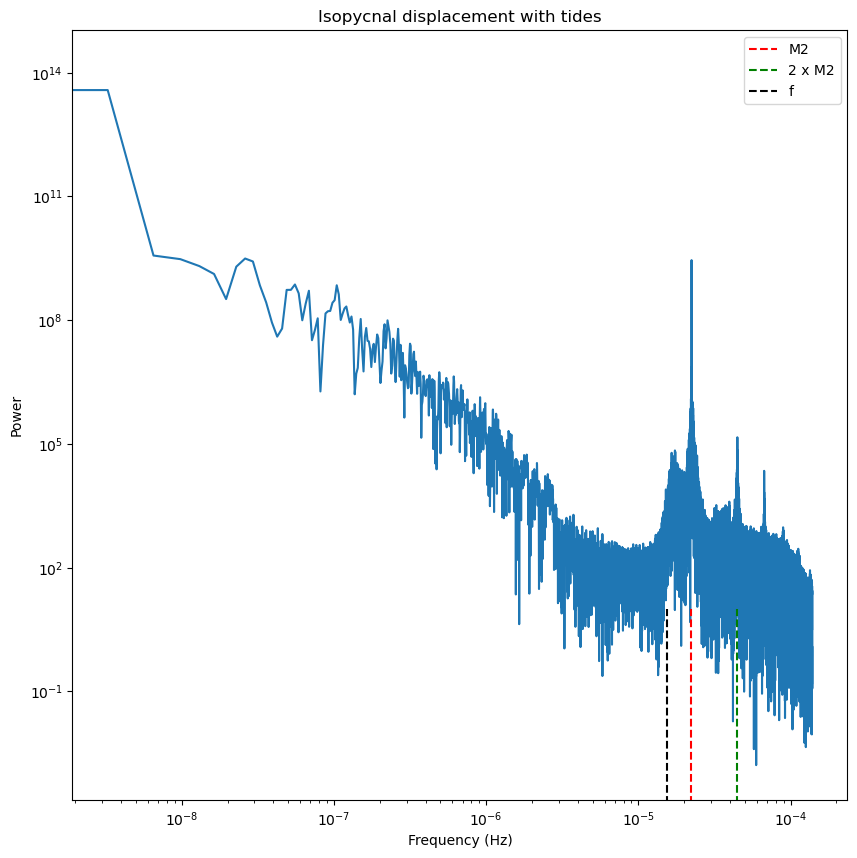

In [69]:

e = tt.collect_data("full-20",rawdata = ["e"]).sel(yb = 0,method = "nearest").isel(xb = 150).isel(time = slice(24 * 15 * 30 , None))


data = e.e.isel(rho2_i = 40).load()
data = data.assign_coords({"time":data.time * 3600})
plot_power_spectrum(data,"Isopycnal displacement with tides")


loading e...	done.


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


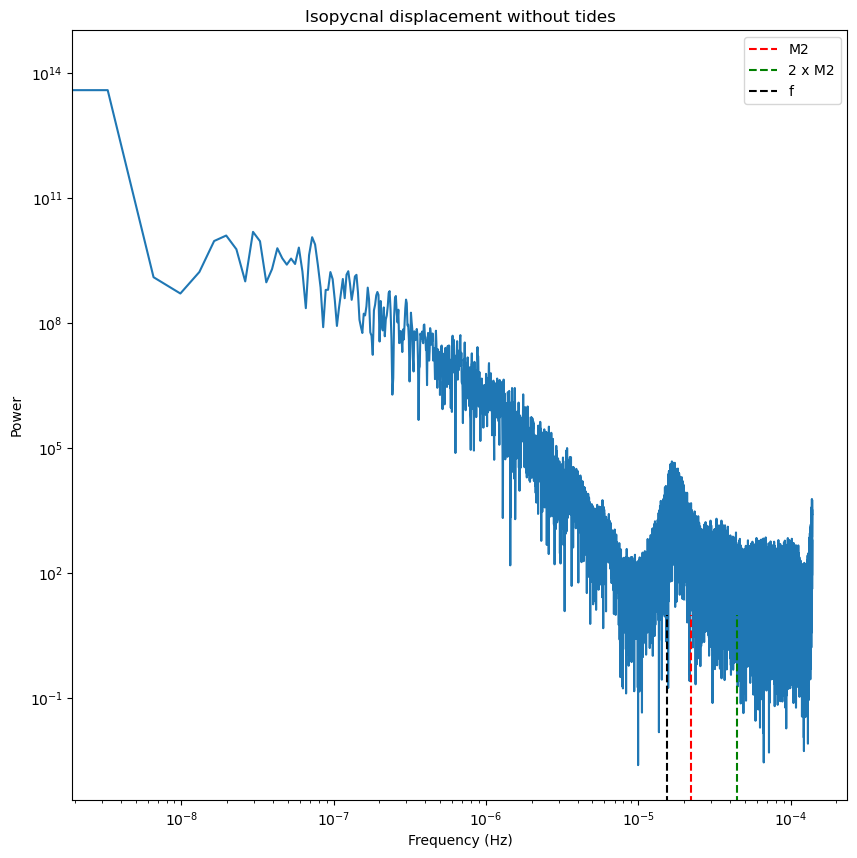

In [68]:

e = tt.collect_data("notide-20",rawdata = ["e"]).sel(yb = 0,method = "nearest").isel(xb = 150).isel(time = slice(24 * 15 * 30 , None))


data = e.e.isel(rho2_i = 40).load()
data = data.assign_coords({"time":data.time * 3600})
plot_power_spectrum(data,"Isopycnal displacement without tides")


loading e...	done.


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


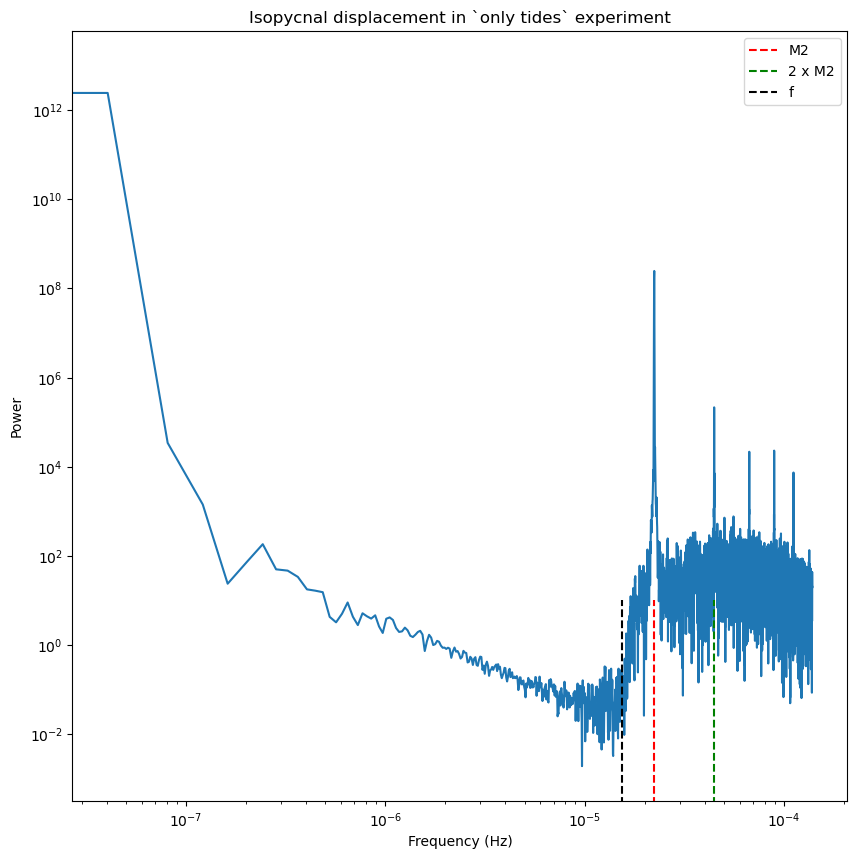

In [52]:

e = tt.collect_data("blank-20",rawdata = ["e"]).sel(yb = 0,method = "nearest").isel(xb = 150).isel(time = slice(24 * 14,None))


data = e.e.isel(rho2_i = 40).load()
data = data.assign_coords({"time":data.time * 3600})
plot_power_spectrum(data,"Isopycnal displacement in `only tides` experiment")

loading e...	done.


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


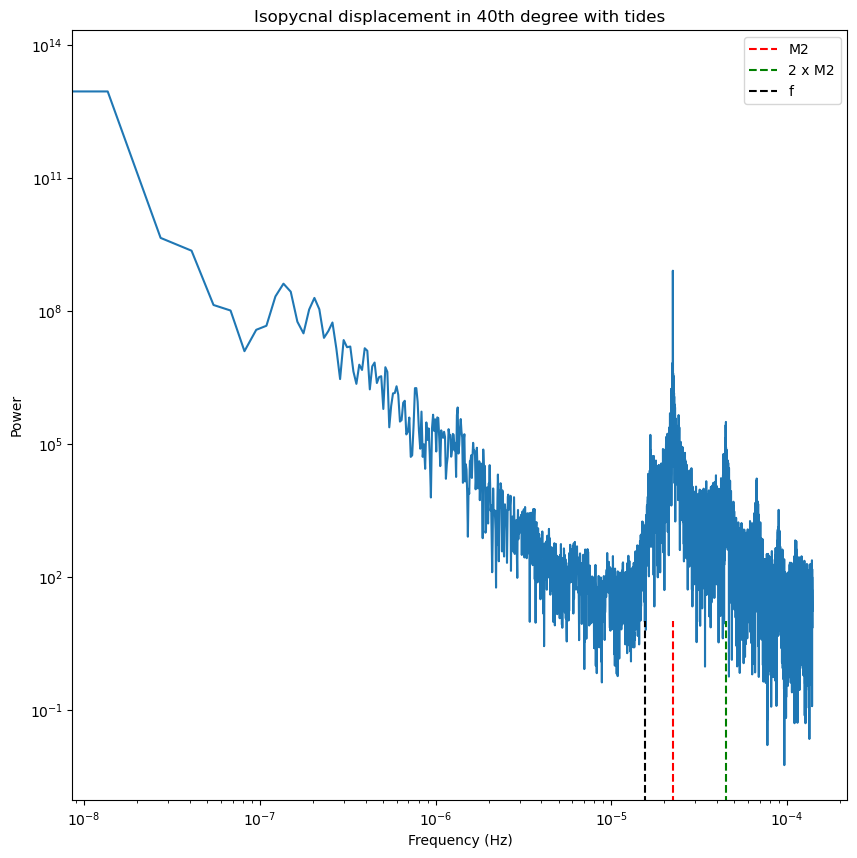

In [74]:

e = tt.collect_data("full-40",rawdata = ["e"]).sel(yb = 0,method = "nearest").isel(xb = 300)

e = e.isel(time = slice(24 * 5 * 30 , 24 * 5 * 200))

data = e.e.isel(rho2_i = 40).load()
data = data.assign_coords({"time":data.time * 3600})
plot_power_spectrum(data,"Isopycnal displacement in 40th degree with tides")

loading e...	done.


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


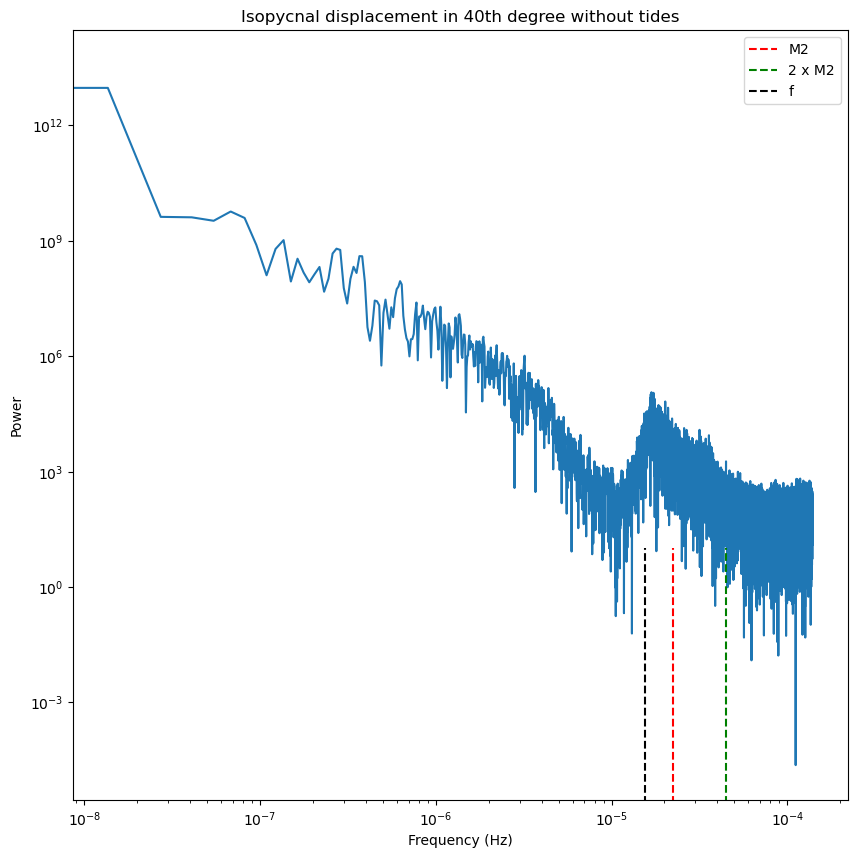

In [72]:

e = tt.collect_data("notide-40",rawdata = ["e"]).sel(yb = 0,method = "nearest").isel(xb = 150)

e = e.isel(time = slice(24 * 5 * 30 , 24 * 5 * 200))

data = e.e.isel(rho2_i = 40).load()
data = data.assign_coords({"time":data.time * 3600})
plot_power_spectrum(data,"Isopycnal displacement in 40th degree without tides")

In [73]:

e = tt.collect_data("blank-40",rawdata = ["e"]).sel(yb = 0,method = "nearest").isel(xb = 150)

e = e.isel(time = slice(24 * 5 * 30 ,None))

data = e.e.isel(rho2_i = 40).load()
data = data.assign_coords({"time":data.time * 3600})
plot_power_spectrum(data,"Isopycnal displacement in 40th degree 'only tide' experiment")

loading e...	done.


OSError: no files to open

In [ ]:

e = tt.collect_data("full-40",rawdata = ["e"]).sel(yb = 0,method = "nearest").isel(xb = 150).isel(time = slice(24 * 15 * 30 , None))


data = e.e.isel(rho2_i = 40).load()
data = data.assign_coords({"time":data.time * 3600})
plot_power_spectrum(data,"Isopycnal displacement in 40th degree with tides")